In [8]:
import sys
import datetime
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from lxml import html
import requests

In [19]:
page = requests.get('http://www.walottery.com/WinningNumbers/PastDrawings.aspx?gamename=lotto&unittype=day&unitcount=180')
tree = html.fromstring(page.content)
num = tree.xpath('//td[@class="game-balls"]/ul/li/text()')

num1 = []

for i in reversed(num) :
    num1.append(i)

df = pd.DataFrame(num1, columns=["Numbers"])
df.to_csv('list.csv', index=False)

In [20]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back + 1, 0])
    return numpy. array(dataX), numpy.array(dataY)

In [21]:
look_back = 1
 
# create and fit the LSTM network

#model.fit(trainX, trainY, nb_epoch=30, batch_size=1, verbose=2)

In [22]:
#dataset = numpy.random.randint(49, size=(200,1))
df = pandas.read_csv("list.csv")
dataset = df.as_matrix()
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


print (dataset)


[[ 0.87500006]
 [ 0.85416669]
 [ 0.75000006]
 [ 0.50000006]
 [ 0.47916666]
 [ 0.27083334]
 [ 0.87500006]
 [ 0.85416669]
 [ 0.75000006]
 [ 0.50000006]
 [ 0.47916666]
 [ 0.27083334]
 [ 0.56250006]
 [ 0.50000006]
 [ 0.25      ]
 [ 0.18750001]
 [ 0.04166666]
 [ 0.02083333]
 [ 0.56250006]
 [ 0.50000006]
 [ 0.25      ]
 [ 0.18750001]
 [ 0.04166666]
 [ 0.02083333]
 [ 0.68750006]
 [ 0.62500006]
 [ 0.50000006]
 [ 0.33333334]
 [ 0.29166666]
 [ 0.12500001]
 [ 0.68750006]
 [ 0.62500006]
 [ 0.50000006]
 [ 0.33333334]
 [ 0.29166666]
 [ 0.12500001]
 [ 0.87500006]
 [ 0.72916669]
 [ 0.54166669]
 [ 0.39583334]
 [ 0.29166666]
 [ 0.18750001]
 [ 0.87500006]
 [ 0.72916669]
 [ 0.54166669]
 [ 0.39583334]
 [ 0.29166666]
 [ 0.18750001]
 [ 1.        ]
 [ 0.93750006]
 [ 0.83333337]
 [ 0.25      ]
 [ 0.18750001]
 [ 0.14583334]
 [ 1.        ]
 [ 0.93750006]
 [ 0.83333337]
 [ 0.25      ]
 [ 0.18750001]
 [ 0.14583334]
 [ 0.375     ]
 [ 0.3125    ]
 [ 0.25      ]
 [ 0.22916667]
 [ 0.0625    ]
 [ 0.04166666]
 [ 0.375  

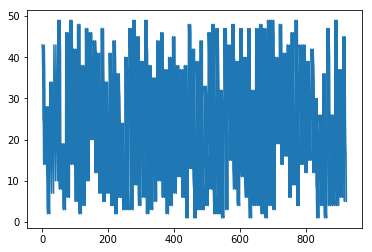

In [23]:
plt.figure()
plt.plot(scaler.inverse_transform(dataset))
plt.show()

In [24]:
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
#test = dataset[train_size:len(dataset),:]
test1 = dataset[len(dataset) -30: len(dataset), :]
print (train.shape)
#print (test.shape)

(924, 1)


In [25]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)

 
# reshape input to be [samples, time steps, features]
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0],  testX.shape[1], 1))
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

print( trainX.shape )
print( trainY.shape)



(893, 30, 1)
(893,)


In [ ]:
d = 0.2
#model = Sequential()
#model.add(LSTM(128, input_shape=(30, 1), return_sequences=True))
#model.add(Dropout(d))
#model.add(LSTM(64, input_shape=(30, 1), return_sequences=False))
#model.add(Dropout(d))
#model.add(Dense(1))
#model.add(Dense(16,init='uniform',activation='relu'))        
#model.add(Dense(1,init='uniform',activation='linear'))
#model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
#model.fit(trainX, trainY, nb_epoch=50, batch_size=1, verbose=2)

model = Sequential()
model.add(LSTM(30, input_shape=(30, 1), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=50, batch_size=1, verbose=2)

Epoch 1/50
14s - loss: 0.0745
Epoch 2/50
14s - loss: 0.0492
Epoch 3/50
13s - loss: 0.0367
Epoch 4/50
13s - loss: 0.0263
Epoch 5/50
13s - loss: 0.0208
Epoch 6/50
13s - loss: 0.0188
Epoch 7/50
13s - loss: 0.0180
Epoch 8/50
14s - loss: 0.0175
Epoch 9/50
14s - loss: 0.0173
Epoch 10/50
23s - loss: 0.0169
Epoch 11/50
14s - loss: 0.0168
Epoch 12/50
14s - loss: 0.0169
Epoch 13/50
14s - loss: 0.0163
Epoch 14/50
13s - loss: 0.0162
Epoch 15/50
13s - loss: 0.0159
Epoch 16/50
13s - loss: 0.0157
Epoch 17/50
13s - loss: 0.0153
Epoch 18/50
13s - loss: 0.0155
Epoch 19/50
15s - loss: 0.0163
Epoch 20/50
14s - loss: 0.0152
Epoch 21/50
14s - loss: 0.0150
Epoch 22/50
14s - loss: 0.0147
Epoch 23/50
14s - loss: 0.0146
Epoch 24/50
15s - loss: 0.0146
Epoch 25/50


In [10]:
##### PREDICT USING TRAINED MODEL #####
#testPredict = model.predict(testX)
trainPred = model.predict(trainX)

In [22]:
#p = scaler.inverse_transform(testPredict)
#testY1 = scaler.inverse_transform([testY])
 
#testScore = math.sqrt(mean_squared_error(testY1[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))
 
# shift test predictions for plotting
#testPredictPlot = numpy.empty_like(dataset)
#testPredictPlot[:, :] = numpy.nan
#testPredictPlot[:-(look_back+1), :] = testPredict
 
#print(p)
#print(testY1)

#testY1 = numpy.reshape(testY1, (testY1.shape[1], 1))

#print(test1)

testX = numpy .array(test1)
print(testX)
testX = numpy.reshape(testX, (30, 1))
#pred = model.predict(testX)
#p = scaler.inverse_transform(pred)
#print(p)
    
#test1.append(pred)
#test1 = test1[1:-1, :]

[[ 0.02083333]
 [ 0.04166666]
 [ 0.18750001]
 [ 0.25      ]
 [ 0.50000006]
 [ 0.56250006]
 [ 0.27083334]
 [ 0.47916666]
 [ 0.50000006]
 [ 0.75000006]
 [ 0.85416669]
 [ 0.87500006]
 [ 0.27083334]
 [ 0.47916666]
 [ 0.50000006]
 [ 0.75000006]
 [ 0.85416669]
 [ 0.87500006]
 [ 0.33333334]
 [ 0.35416666]
 [ 0.375     ]
 [ 0.39583334]
 [ 0.52083337]
 [ 0.54166669]
 [ 0.33333334]
 [ 0.35416666]
 [ 0.375     ]
 [ 0.39583334]
 [ 0.52083337]
 [ 0.54166669]]


In [27]:
test1 = test1[0:30]
for i in range(6) :
    testX = numpy .array(test1)
    #testX, testY = create_dataset(test1, look_back)
    testX = numpy.reshape(testX, (1, 30, 1))
    pred = model.predict(testX)
    p = scaler.inverse_transform(pred)
    print(p)
    
    test1 = numpy.append(test1, pred)
    test1 = test1[1:len(test1)]



[[ 9.92935753]]
[[ 14.87158394]]
[[ 21.60935211]]
[[ 29.27055359]]
[[ 36.93709946]]
[[ 5.28099918]]


In [28]:
import matplotlib.pyplot as plt2

#plt2.plot(p,color='red', label='prediction')
#plt2.plot(testY1,color='blue', label='Actual')
#plt2.legend(loc='upper left')
#plt2.show()

Test Score: 27.11 RMSE


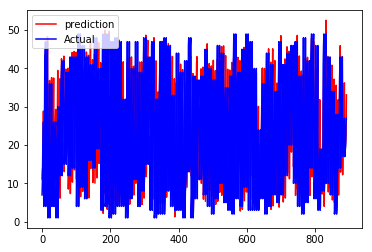

In [29]:
p = scaler.inverse_transform(trainPred)
trainY1 = scaler.inverse_transform([trainY])



testScore = math.sqrt(mean_squared_error(trainY1[0], trainPred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainY1 = numpy.reshape(trainY1, (trainY1.shape[1], 1))

plt2.plot(p,color='red', label='prediction')
plt2.plot(trainY1,color='blue', label='Actual')
plt2.legend(loc='upper left')
plt2.show()